In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
legend_properties = {'weight':'bold'}

In [2]:
data_folder = r"E:\data\dao-0310-23\V4_4\Turnover_5"
dao_performance_file = data_folder + r"\dao_performance_across_turnover"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turnover"
autonomy_performance_file = data_folder + r"\autonomy_performance_across_turnover"

consensus_performance_file = data_folder + r"\consensus_performance_across_turnover"
superior_performance_file = data_folder + r"\superior_performance_across_turnover"

dao_diversity_file = data_folder + r"\dao_diversity_across_turnover"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turnover"
autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turnover"

dao_variance_file = data_folder + r"\dao_variance_across_turnover"
hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_turnover"
autonomy_variance_file = data_folder + r"\autonomy_variance_across_turnover"


dao_original_performance_file = data_folder + r"\dao_performance_across_turnover_time"
hierarchy_original_performance_file = data_folder + r"\hierarchy_performance_across_turnover_time"
autonomy_original_performance_file = data_folder + r"\autonomy_performance_across_turnover_time"

dao_original_diversity_file = data_folder + r"\dao_diversity_across_turnover_time"
hierarchy_original_diversity_file = data_folder + r"\hierarchy_diversity_across_turnover_time"
autonomy_original_diversity_file = data_folder + r"\autonomy_diversity_across_turnover_time"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(autonomy_performance_file, 'rb') as infile:
    autonomy_performance = pickle.load(infile)

with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(autonomy_diversity_file, 'rb') as infile:
    autonomy_diversity = pickle.load(infile)

with open(consensus_performance_file, 'rb') as infile:
    consensus_performance = pickle.load(infile)
with open(superior_performance_file, 'rb') as infile:
    superior_performance = pickle.load(infile)

with open(dao_original_performance_file, 'rb') as infile:
    dao_original_performance = pickle.load(infile)
with open(hierarchy_original_performance_file, 'rb') as infile:
    hierarchy_original_performance = pickle.load(infile)
with open(autonomy_original_performance_file, 'rb') as infile:
    autonomy_original_performance = pickle.load(infile)

with open(dao_original_diversity_file, 'rb') as infile:
    dao_original_diversity = pickle.load(infile)
with open(hierarchy_original_diversity_file, 'rb') as infile:
    hierarchy_original_diversity = pickle.load(infile)
with open(autonomy_original_diversity_file, 'rb') as infile:
    autonomy_original_diversity = pickle.load(infile)

In [3]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

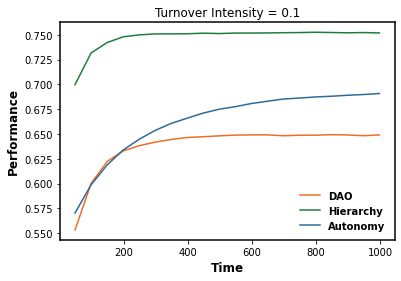

<Figure size 432x288 with 0 Axes>

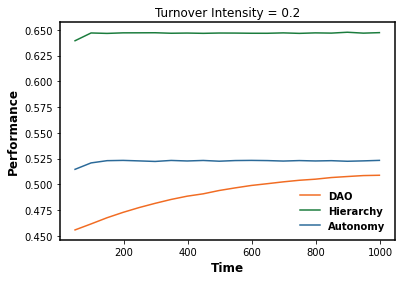

<Figure size 432x288 with 0 Axes>

In [5]:
turnover_rate_list = [0.1, 0.2]
period = 50
for index, turnover_rate  in enumerate(turnover_rate_list): # the data begins with 0.10, so skip the first one
    x = range(len(dao_original_performance[index]))
    # plt.plot(x, dao_original_performance[curve_index], "k-", color=nature_orange, label="DAO")
    # plt.plot(x, hierarchy_original_performance[curve_index], "k-", color=nature_green, label="Hierarchy")
    # plt.plot(x, autonomy_original_performance[curve_index], "k-", color=nature_blue, label="Autonomy")
    # selected grey background
    periods = np.arange(period-2, 1000, period)
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    grey_dao_performance = [each for index, each in enumerate(dao_original_performance[index]) if index in periods]
    grey_hierarchy_performance = [each for index, each in enumerate(hierarchy_original_performance[index]) if index in periods]
    grey_autonomy_performance = [each for index, each in enumerate(autonomy_original_performance[index]) if index in periods]
    # print(grey_autonomy_performance)
    plt.plot(periods, grey_dao_performance, '-', color=nature_orange, label="DAO")
    plt.plot(periods, grey_hierarchy_performance, '-', color=nature_green, label="Hierarchy")
    plt.plot(periods, grey_autonomy_performance, '-', color=nature_blue, label="Autonomy")

    plt.xlabel('Time', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)

    # Plot the intersections
    # Find the intersection points between the two lines
    line1_x = periods
    line2_x = periods
    line1_y = grey_dao_performance
    line2_y = grey_hierarchy_performance
    end_flag = False
    for i in range(len(line1_x) - 1):
        if end_flag:
            break
        for j in range(len(line2_x) - 1):
            x1 = line1_x[i]
            y1 = line1_y[i]
            x2 = line1_x[i+1]
            y2 = line1_y[i+1]
            x3 = line2_x[j]
            y3 = line2_y[j]
            x4 = line2_x[j+1]
            y4 = line2_y[j+1]

            # Calculate the slope and y-intercept of each line segment
            m1 = (y2 - y1) / (x2 - x1)
            b1 = y1 - m1 * x1
            m2 = (y4 - y3) / (x4 - x3)
            b2 = y3 - m2 * x3

            # Calculate the intersection point of the two line segments
            if m1 != m2:
                x_int = (b2 - b1) / (m1 - m2)
                y_int = m1 * x_int + b1

                # Check if the intersection point lies within the x-range and y-range of both line segments
                if (min(x1,x2) <= x_int <= max(x1,x2) and
                    min(y1,y2) <= y_int <= max(y1,y2) and
                    min(x3,x4) <= x_int <= max(x3,x4) and
                    min(y3,y4) <= y_int <= max(y3,y4)):

                    # Plot the intersection point
                    plt.plot(x_int, y_int, 'ro')
                    # Add a note to the point
                    arrow = plt.annotate('({0}, {1})'.format(math.ceil(x_int), '%.2f'%y_int), xy=(x_int, y_int), xytext=(x_int+1, y_int+0.05),
                                         arrowprops=dict(arrowstyle="->", facecolor='black'))
                    end_flag =True
                    break # only plot the first one
    plt.title("Turnover Intensity = {0}".format(turnover_rate_list[index]))
    plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
    plt.savefig(data_folder + r"\F{0}_Turbulence_performance.png".format(turnover_rate_list[index]),
                transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()

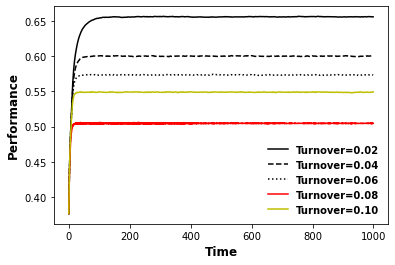

<Figure size 432x288 with 0 Axes>

In [5]:
# DAO Turbulence
# turnover_rate_list = [0.02, 0.04, 0.06, 0.80, 0.10]
legend_properties = {'weight':'bold'}
x = range(len(dao_original_performance[0]))
plt.plot(x, dao_original_performance[0], "k-", label="Turnover=0.02")
plt.plot(x, dao_original_performance[1], "k--", label="Turnover=0.04")
plt.plot(x, dao_original_performance[2], "k:", label="Turnover=0.06")
plt.plot(x, dao_original_performance[3], "r-", label="Turnover=0.08")
plt.plot(x, dao_original_performance[4], "y-", label="Turnover=0.10")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
# plt.savefig(data_folder + r"\DAO_Turnover_performance.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

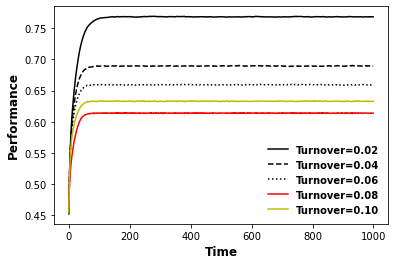

<Figure size 432x288 with 0 Axes>

In [6]:
# Hierarchy Turnover
# turnover_rate_list = [0.02, 0.04, 0.06, 0.80, 0.10]
legend_properties = {'weight':'bold'}
x = range(len(hierarchy_original_performance[0]))
plt.plot(x, hierarchy_original_performance[0], "k-", label="Turnover=0.02")
plt.plot(x, hierarchy_original_performance[1], "k--", label="Turnover=0.04")
plt.plot(x, hierarchy_original_performance[2], "k:", label="Turnover=0.06")
plt.plot(x, hierarchy_original_performance[3], "r-", label="Turnover=0.08")
plt.plot(x, hierarchy_original_performance[4], "y-", label="Turnover=0.10")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
# plt.savefig(data_folder + r"\Hierarchy_Turnover_performance.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

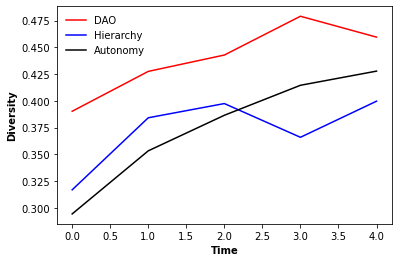

<Figure size 432x288 with 0 Axes>

In [7]:
# Diversity
x = range(len(dao_performance))
plt.plot(range(len(dao_diversity)), dao_diversity, "r-", label="DAO")
plt.plot(range(len(hierarchy_diversity)), hierarchy_diversity, "b-", label="Hierarchy")
plt.plot(range(len(autonomy_diversity)), autonomy_diversity, "k-", label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=10)
plt.ylabel('Diversity', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
# plt.savefig(data_folder + r"\DHA_diversity.png", transparent=False, dpi=300)
plt.show()
plt.clf()